In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
import pylab
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
auto_data = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, header=None, names=["mpg", 'cylinders', 'displacements', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

In [9]:
auto_data.head()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
# auto_data = auto_data.drop('car_name', axis=1)
auto_data['origin'] = auto_data['origin'].replace({1:'america', 2:'europe', 3:'asia'})
auto_data.head()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


In [14]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [67]:
auto_data = auto_data.dropna()
auto_data.isna().values.any()

False

In [68]:
X = auto_data.drop('mpg', axis=1)

In [69]:
y = auto_data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
regression_model = SVR(kernel='linear', C=0.5)

In [92]:
auto_data.describe()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.201531,0.173469
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.401656,0.379136
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [93]:
regression_model.fit(X_train, y_train)

SVR(C=0.5, kernel='linear')

In [94]:
regression_model.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899, -1.6119645 ,  0.40460805,  1.20735645]])

In [95]:
regression_model.score(X_train, y_train)

0.8087716316091305

In [96]:
predictors = X_train.columns
coef = Series(regression_model.coef_[0], predictors).sort_values()

<AxesSubplot:title={'center':'Model coeficients'}>

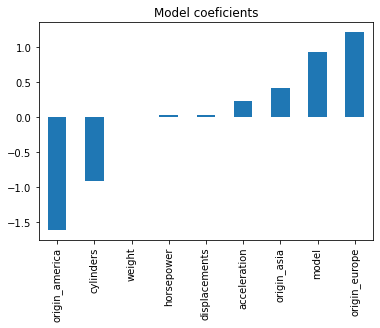

In [97]:
coef.plot(kind='bar', title='Model coeficients')

In [98]:
y_predict = regression_model.predict(X_test)

In [99]:
regression_model.score(X_test, y_test)

0.8262845397302738

In [100]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


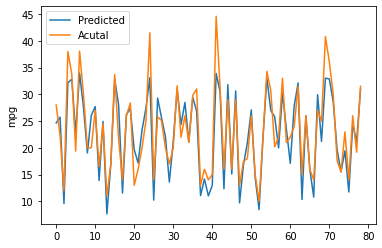

In [101]:
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Acutal')
plt.ylabel('mpg')
plt.legend()
plt.show()